In [1]:
NetID = "gowtham4"
Name = "Gowtham Kuntumalla"
Reg_status = "4 Credit, ECE 498"

# Part A: Parsing

In [2]:
# read in pf.log
with open('pf.log') as f:
    lines = f.readlines()

# strip all lines of whitespace
lines = [line.strip() for line in lines]


In [3]:
# parse each line into your data structure
# remember to convert addresses from strings to integers

"""  Dictionary to hold a list of backtraces for each pagefault 

key = tuple (pagefault details) -- Tuple
value = list (backtraces) -- 2D list

"""

parsed_lines = {}

i = 0
while(i<len(lines)):
    line = lines[i]
    if not (line[:2] == '</'):
        
        #parse main line
        pf_details = tuple(line.split(':'))
        i+=1        
        pf_backtraces = []
        
        # parse backtraces        
        while(i< len(lines) and lines[i][:2] == '</'):
            library, off_adr = lines[i].split('+')
            offset,address = off_adr.split('/')
            pf_backtraces.append([library,str(int(address.rstrip('>'),16)),str(int(offset,16))])
            i+=1
             
        parsed_lines[pf_details] = pf_backtraces
        
        

In [4]:
#[print(v) for i, v in enumerate(parsed_lines.items()) if i < 5]    

for i, v in enumerate(parsed_lines.items()):
    if (i<5):
        print(v)
        
    else:
        break

(('1506816069251', 'firefox', '13179', '0x282235aae', 'R', 'minor', '50'), [['</usr/lib/x86_64-linux-gnu/libcairo.so.2.11400.10', '16727808', '686943'], ['</lib/x86_64-linux-gnu/libglib-2.0.so.0.5400.1', '16748032', '660132'], ['</lib/x86_64-linux-gnu/libpthread-2.26.so', '16746496', '483292'], ['</usr/lib/x86_64-linux-gnu/libX11.so.6.3.0', '16748800', '108902'], ['</lib/x86_64-linux-gnu/libc-2.26.so', '16767232', '7501']])
(('1506816074664', 'firefox', '13179', '0x10fb420b4', 'W', 'minor', '23'), [['</lib/x86_64-linux-gnu/libglib-2.0.so.0.5400.1', '16657664', '64606'], ['</usr/lib/x86_64-linux-gnu/libxcb.so.1.1.0', '16756992', '607425'], ['</lib/x86_64-linux-gnu/libpthread-2.26.so', '16759296', '459484'], ['</lib/x86_64-linux-gnu/libc-2.26.so', '16723456', '528024'], ['</usr/lib/x86_64-linux-gnu/libgdk-x11-2.0.so.0.2400.31', '16689664', '40592'], ['</usr/lib/x86_64-linux-gnu/libX11.so.6.3.0', '16659456', '385253'], ['</usr/lib/x86_64-linux-gnu/libcairo.so.2.11400.10', '16731648', '161

In [5]:
# write your data structure out to pf.csv
# include an index column with unique indices for each page fault
with open('pf.csv', 'w') as f:
    # write header line
    f.write('\t'.join(['index', 'time', 'proc_name', 'pid', 'pfaddr', 'rw', 'major_minor', 'resolve_time', 'lib', 'addr', 'offset']))
    f.write('\n')
    
    for index, key in enumerate(parsed_lines):
        
        # we will append backtrace values later
        csv_entry = [str(index+1)]+ list(key)       
        backtraces = parsed_lines[key]
        
        # write all backtraces with a single key
        for backt in backtraces:
            
            f.write('\t'.join(csv_entry + backt))
            f.write('\n')
        
    
    # write each page fault & backtrace entry
    # hint: take a look at python's enumerate() function to generate indices
    # Remember that indices should be unique to each page fault



# Part B: Analysis

In [6]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [7]:
# relevant options when reading in pf.csv: sep, parse_dates
df = pd.read_csv('pf.csv', sep = '\t', parse_dates = [1])
# set the index of the data frame
df['time'] = pd.to_datetime(df['time'],unit='ms') # epoch time is in milliseconds
df.set_index('time', inplace=True)

In [8]:

df.sort_index(inplace=True)
print(df.index,'\n\n')
print("Answer (B.a):  Time Range : {0} to {1}".format(df.index[0],df.index[-1]))

DatetimeIndex(['2017-10-01 00:01:09.251000', '2017-10-01 00:01:09.251000',
               '2017-10-01 00:01:09.251000', '2017-10-01 00:01:09.251000',
               '2017-10-01 00:01:09.251000', '2017-10-01 00:01:14.664000',
               '2017-10-01 00:01:14.664000', '2017-10-01 00:01:14.664000',
               '2017-10-01 00:01:14.664000', '2017-10-01 00:01:14.664000',
               ...
               '2018-01-07 18:56:37.930000', '2018-01-07 18:56:37.930000',
               '2018-01-07 18:56:37.930000', '2018-01-07 18:56:37.930000',
               '2018-01-07 18:56:37.930000', '2018-01-07 18:56:37.930000',
               '2018-01-07 18:57:45.990000', '2018-01-07 18:59:50.839000',
               '2018-01-07 18:59:50.839000', '2018-01-07 18:59:50.839000'],
              dtype='datetime64[ns]', name='time', length=2809731, freq=None) 


Answer (B.a):  Time Range : 2017-10-01 00:01:09.251000 to 2018-01-07 18:59:50.839000


In [9]:
df.index[-1] - df.index[0]

Timedelta('98 days 18:58:41.588000')

In [10]:
print('Answer (B.b) Unique Processes:')
uniq_proc = df.proc_name.unique()
print(uniq_proc)
print(len(uniq_proc))

print('Number of counts for each unique process for each')
df.groupby('proc_name').pid.count() # Also df.groupby('proc_name').pid.count().sum() == df['index'].count().sum() 

Answer (B.b) Unique Processes:
['firefox' 'thunderbird' 'watchdog' 'auditd' 'subl' 'gitlab-runner' 'sshd'
 'google-chrome' 'bash' 'tmux' 'xorg' 'htop']
12
Number of counts for each unique process for each


proc_name
auditd           228982
bash             229904
firefox          233452
gitlab-runner    218405
google-chrome    238107
htop             232215
sshd             246903
subl             245982
thunderbird      237590
tmux             219329
watchdog         234938
xorg             243924
Name: pid, dtype: int64

Answer (B.c): Major - Minor bar plots


Text(0, 0.5, 'Count (Number)')

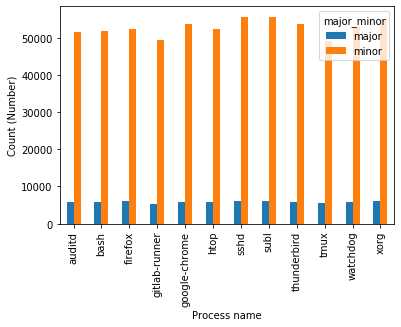

In [11]:
print('Answer (B.c): Major - Minor bar plots')

maj_min = df.groupby(['proc_name','index','major_minor'])['major_minor'].nunique()#.reset_index().set_index('proc_name')
num_errors_type = maj_min.groupby(['proc_name','major_minor']).count().unstack()
num_errors_type.plot.bar()
plt.xlabel('Process name')
plt.ylabel('Count (Number)')

Answer (B.d): Histograms separated by type of pagefault

 aggregate results of minor page faults are:
                    mean        std
proc_name                          
auditd         27.522918  13.291775
bash           27.429991  13.285091
firefox        27.586621  13.292283
gitlab-runner  27.401360  13.241882
google-chrome  27.486030  13.217610
htop           27.359186  13.283209
sshd           27.541563  13.300029
subl           27.426151  13.238984
thunderbird    27.458199  13.254275
tmux           27.421387  13.280019
watchdog       27.615395  13.272543
xorg           27.528463  13.263153



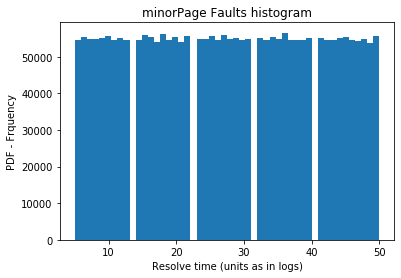


 aggregate results of major page faults are:
                     mean         std
proc_name                            
auditd         218.191273  105.493006
bash           219.380514  105.209861
firefox        219.960241  104.477581
gitlab-runner  213.306051  105.639431
google-chrome  218.813443  104.972038
htop           219.088798  104.744666
sshd           216.805671  105.636435
subl           215.073090  106.021568
thunderbird    219.667928  106.878117
tmux           219.742614  105.805424
watchdog       215.778328  105.352504
xorg           216.892856  105.984679



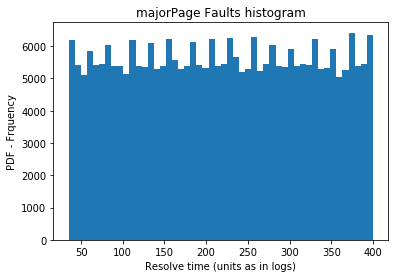

In [12]:
print('Answer (B.d): Histograms separated by type of pagefault')
#d = df.groupby(['proc_name','index','major_minor']).nunique()

for typ in ['minor','major']:
    
    df_i = df[df['major_minor'] == typ]
    print('\n aggregate results of {0} page faults are:'.format(typ))
    print(df_i.groupby('proc_name')['resolve_time'].agg(['mean','std']))
    print()
    plt.figure()
    df_i['resolve_time'].plot(kind = 'hist',bins = 50)
    plt.xlabel('Resolve time (units as in logs)')
    plt.ylabel('PDF - Frquency')
    t = typ + 'Page Faults histogram'
    plt.title(t)
    plt.show()
    

# Part C: Making Predictions

In [13]:
# c.a) priors = P(process_i)

df_prior = df.groupby(['proc_name','index']).count()
proc_priors = {}
for proc in uniq_proc:
    proc_priors[proc] = df_prior.loc[proc].major_minor.count()/df_prior.major_minor.count()

print("C.a) priors are :\n\n")
proc_priors
## sanity check for checking if sum of all priors is 1
# sums = 0
# for v in proc_priors.values():
#     sums+=v
# print(sums) # =1.0

C.a) priors are :




{'firefox': 0.08294107937664348,
 'thunderbird': 0.08451199244140381,
 'watchdog': 0.08372369005202226,
 'auditd': 0.08137016631188317,
 'subl': 0.08786014320352431,
 'gitlab-runner': 0.07761078921306362,
 'sshd': 0.08782456999100709,
 'google-chrome': 0.08480084692704361,
 'bash': 0.08171451500904983,
 'tmux': 0.0777786947761449,
 'xorg': 0.08690108939406013,
 'htop': 0.0829624233041538}

In [14]:
# c.b) major minor pagefaults 

""" 1. find p(page_fault = major/proc = ...) from data
2. apply naive bayes rule
3. MAP rule to get process with maximum probability = p(proc = .../page_fault = major)
""" 

df_major_minor = df.groupby(['proc_name','index','major_minor'])['major_minor'].count().unstack()

# number of page faults of one type
major_faults = df_major_minor.major.dropna().count()
minor_faults = df_major_minor.minor.dropna().count()

#p(page_fault = major/proc = ...)
p_major_proc =  {}
p_minor_proc =  {}

# step1 

for proc in uniq_proc:
    p_major_proc[proc] = df_major_minor.loc[proc].major.dropna().count()/major_faults
    p_minor_proc[proc] = df_major_minor.loc[proc].minor.dropna().count()/minor_faults

# step2    

p_proc_major = {}
denom_major = 0
for proc in uniq_proc:
    denom_major += p_major_proc[proc]*proc_priors[proc]

for proc in uniq_proc:
    p_proc_major[proc] = p_major_proc[proc]*proc_priors[proc]/denom_major
    
    
# step3


p_proc_major_list = [(value, key) for key, value in p_proc_major.items()]
max_major_proc = max(p_proc_major_list)[1]
print("Process that is likely to occur: ", max_major_proc,round(p_proc_major[max_major_proc],4))
    
    
    

Process that is likely to occur:  subl 0.0921


In [15]:
# c.c) read access pagefaults 

""" 1. find p(page_fault = major/proc = ...) from data
2. apply naive bayes rule
3. MAP rule to get process with maximum probability = p(proc = .../page_fault = major)
""" 

df_read_write = df.groupby(['proc_name','index','rw'])['rw'].count().unstack()

# number of page faults of one type
read_faults = df_read_write.R.dropna().count()
write_faults = df_read_write.W.dropna().count()

#p(page_fault = major/proc = ...)
p_read_proc =  {}
p_write_proc =  {}

# step1 

for proc in uniq_proc:
    p_read_proc[proc] = df_read_write.loc[proc].R.dropna().count()/read_faults
    p_write_proc[proc] = df_read_write.loc[proc].W.dropna().count()/write_faults

# step2    

p_proc_read = {}
denom_read = 0
for proc in uniq_proc:
    denom_read += p_read_proc[proc]*proc_priors[proc]

for proc in uniq_proc:
    p_proc_read[proc] = p_read_proc[proc]*proc_priors[proc]/denom_major
    
    
# step3


p_proc_read_list = [(value, key) for key, value in p_proc_read.items()]
max_read_proc = max(p_proc_read_list)[1]
print("Process that is likely to occur: ", max_read_proc,round(p_proc_read[max_read_proc],4))
    


Process that is likely to occur:  subl 0.0923


In [16]:
# c.d) type of classifier

print("We would use Naive Bayes Classifier for classifying. It is a decent first estimate\
considering the fact: independence of read/write operations and type of fault (major/minor)")


We would use Naive Bayes Classifier for classifying. It is a decent first estimateconsidering the fact: independence of read/write operations and type of fault (major/minor)
